CAP – Cumulative Accuracy Profile
Analysis with PYTHON

CAP popularly called the ‘Cumulative Accuracy Profile’ is used in the performance evaluation of the classification model. It helps us to understand and conclude about the robustness of the classification model. In order to visualize this, three distinct curves are plotted in our plot:

A random plot
A plot obtained by using a SVM classifier or a random forest classifier
A perfect plot( an ideal line)


We are working the DATA to understand the concept.

Code: Loading dataset

In [9]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#loading dataset
data = pd.read_csv('/Users/Balaram/Documents/python/PracticalPython/Datasets/Social_Network_Ads.csv')

print ("Data Head: \n \n",data.head())

Data Head: 
 
     User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [10]:
#input and output

In [17]:
#x = data.iloc[rows,columns]

x = data.iloc[:,2:4]
y = data.iloc[:,4]

print("input : \n",x.iloc[0:10,:])

input : 
    Age  EstimatedSalary
0   19            19000
1   35            20000
2   26            43000
3   27            57000
4   19            76000
5   27            58000
6   27            84000
7   32           150000
8   25            33000
9   35            65000


Code : Splitting dataset for training and testing.

In [22]:
# splitting data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

Code : Random Forest Classifier

In [24]:
# classifier
from sklearn.ensemble import RandomForestClassifier 
classifier = RandomForestClassifier(n_estimators = 400) 
  
# training 
classifier.fit(x_train, y_train) 
  
# predicting 
pred = classifier.predict(x_test) 


Code : Finding the classifier accuracy.

In [25]:
# Model Performance 
from sklearn.metrics import accuracy_score 
print("Accuracy : ", accuracy_score(y_test, pred) *  100) 


Accuracy :  90.83333333333333


Random Model
The random plot is made under the assumption that we have plotted the total number of points ranging from 0 to the total number of data points in the dataset. The y-axis has been kept as the total number of points for which the dependent variable from our dataset has the outcome as 1. The random plot can be understood like a linearly increasing relationship. An example is a model that predicts whether a product is bought (positive outcome) by each individual from a group of people (classifying parameter) based on factors such as their gender, age, income etc. If group members would be contacted at random, the cumulative number of products sold would rise linearly toward a maximum value corresponding to the total number of buyers within the group. This distribution is called the “random” CAP

Code : Random Model

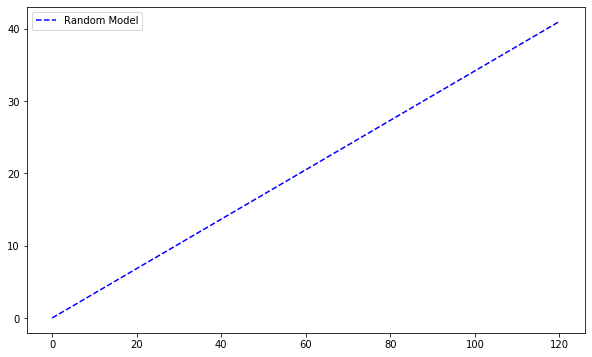

In [26]:
# code for the random plot 
import matplotlib.pyplot as plt 
import numpy as np 
  
# length of the test data 
total = len(y_test) 
  
# Counting '1' labels in test data 
one_count = np.sum(y_test) 
  
# counting '0' lables in test data  
zero_count = total - one_count 
  
plt.figure(figsize = (10, 6)) 
  
# x-axis ranges from 0 to total people contacted  
# y-axis ranges from 0 to the total positive outcomes. 
  
plt.plot([0, total], [0, one_count], c = 'b',  
         linestyle = '--', label = 'Random Model') 
plt.legend() 

Random Forest Classifier Line
Code : Random forest classification algorithm is applied to the dataset for the random classifier line plot

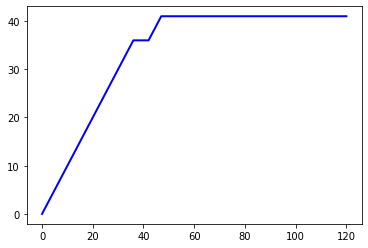

In [29]:
lm = [y for _, y in sorted(zip(pred, y_test), reverse = True)] 
x = np.arange(0, total + 1) 
y = np.append([0], np.cumsum(lm)) 
plt.plot(x, y, c = 'b', label = 'Random classifier', linewidth = 2) 

Explanation: pred is the prediction made by the random classifier. We zip the prediction and test values and sort it in the reverse order so that higher values come first and then the lower values. We extract only the y_test values in an array and store it in lm. np.cumsum() creates an array of values while cumulatively adding all previous values in the array to the present value.The x-values will be ranging from 0 to the total + 1. We add one to the total cause arange() does not include one to the array and we want the x axis to range from 0 to the total.

Perfect Model
We then plot the perfect plot(or the ideal line). A perfect prediction determines exactly which group members will buy the product, such that the maximum number of products sold will be reached with a minimum number of calls. This produces a steep line on the CAP curve that stays flat once the maximum is reached (contacting all other group members will not lead to more products sold), which is the “perfect” CAP.


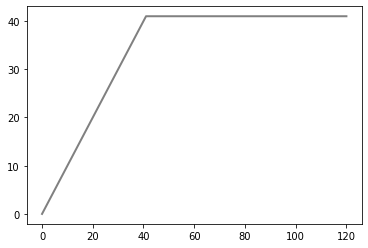

In [30]:
plt.plot([0, one_count, total], [0, one_count, one_count], 
		c = 'grey', linewidth = 2, label = 'Perfect Model') 


Explanation: A perfect model finds positive outcomes in the same number of tries as the number of positive outcomes. We have total of 41 positive outcomes in our dataset and so at exactly 41, the maximum is achieved.

FINAL ANALYSIS:
In any case, our classifier algorithm should not produce a line that lies under the random line. It is considered to be a really bad model in that case. Since the plotted classifier line is close to the ideal line we can say that our model is a really good fit. Take the area under the perfect plot and call it aP. Take the area under the prediction model and call it aR. Then take the ratio as aR/aP. This ratio is called the Accuracy Rate. The closer is the value to 1, the better the model. This is one way to analyse it.

Another way to analyse it would be to project a line from about 50% from the axis on the prediction model and project it on the y-axis. Let us say that we obtain the projection value as X%.

-> 60%        : it is a really bad model
-> 60%<X<70%  : it is still a bad model but better than the first case obviously
-> 70%<X<80%  : it is a good model
-> 80%<X<90%  : it is a very good model
-> 90%<X<100% : it is extraordinarily good and might be one of the overfitting cases.